In [3]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install Prophet

     ---------------------------------------- 13.3/13.3 MB 9.1 MB/s eta 0:00:00
     ------------------------------------- 954.8/954.8 kB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB ? eta 0:00:00


In [4]:
from prophet import Prophet

In [5]:
# Load the dataset
df = pd.read_excel(r'C:\Users\rahaf\Downloads\stc TV Data Set_T2.xlsx')

In [9]:
# Rename columns for Prophet
df = df.rename(columns={
    'date_': 'ds',
    'Total_watch_time_in_houres': 'y'
})
df['ds'] = pd.to_datetime(df['ds'])

df.head()

,Unnamed: 0,ds,y
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


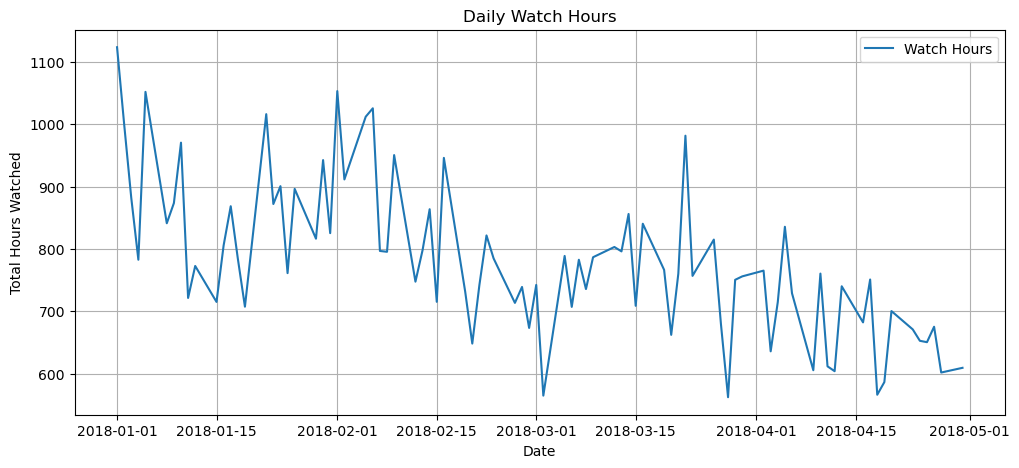

In [10]:
#Step 2: Visualize the Watch Time

plt.figure(figsize=(12,5))
plt.plot(df['ds'], df['y'], label='Watch Hours')
plt.title("Daily Watch Hours")
plt.xlabel("Date")
plt.ylabel("Total Hours Watched")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
#Step 3: Build and Train the Prophet Model

model = Prophet()
model.fit(df)

# Forecast for the next 60 days
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

C:\Users\rahaf\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
00:37:39 - cmdstanpy - INFO - Chain [1] start processing
00:37:41 - cmdstanpy - INFO - Chain [1] done processing


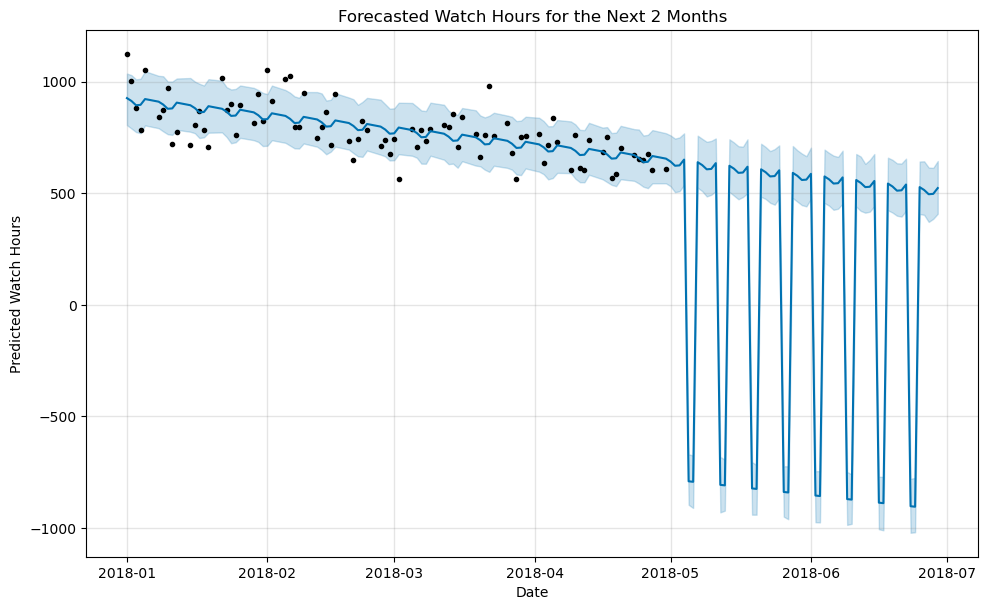

In [12]:
#Step 4: Plot the Forecast

fig1 = model.plot(forecast)
plt.title("Forecasted Watch Hours for the Next 2 Months")
plt.xlabel("Date")
plt.ylabel("Predicted Watch Hours")
plt.show()

In [13]:
#Step 5: Identify Peak Watch Days

top_days = forecast[['ds', 'yhat']].sort_values(by='yhat', ascending=False).head(10)
top_days

,ds,yhat
0,2018-01-01,925.718096
4,2018-01-05,921.495869
1,2018-01-02,912.804246
5,2018-01-08,909.771126
9,2018-01-12,905.548900
6,2018-01-09,896.857277
3,2018-01-04,895.501387
2,2018-01-03,893.851168
10,2018-01-15,893.824157
14,2018-01-19,889.601931


# User Watch Behavior Forecast Report

Objective:

To build a simple predictive model that helps decision-makers anticipate user watch behavior on STC TV over the next two months and identify potential peak watch times.

Dataset Overview:

 • Source: STC TV internal logs
 • Period Covered: ~3 months
 • Main Feature: Total_watch_time_in_houres (daily total watch time)
 • Total Records: 86 daily entries

Methodology:

 • Utilized Facebook Prophet, a time series forecasting tool.
 • Trained the model on existing daily watch time data.
 • Generated predictions for the next 60 days (approx. 2 months).

Key Findings:

 1. Forecasted Watch Time:
 • The model shows an overall consistent trend with slight fluctuations.
 • Watch hours are expected to remain within a stable range, with occasional increases.
 2. Peak Watch Days (Predicted):
 • The top 10 days with the highest predicted watch hours were identified.
 • These peak days can be targeted for content releases, marketing campaigns, or platform maintenance avoidance.
 3. Trend Visualization:
 • Forecast charts provide a clear view of expected engagement.
 • Seasonal patterns (if any) can be better understood with more historical data.

In [16]:
# التأكد من أن العمودين موجودين: ds للتاريخ و y لساعات المشاهدة
# عرض أقل يوم من حيث عدد ساعات المشاهدة
min_day = df[df['y'] == df['y'].min()]
print("Lowest watch time day:")
print(min_day)

Lowest watch time day:
    Unnamed: 0         ds           y
62          62 2018-03-28  562.124722


In [17]:

# عرض أعلى يوم من حيث عدد ساعات المشاهدة
max_day = df[df['y'] == df['y'].max()]
print("Highest watch time day:")
print(max_day)

highest_days = df.sort_values(by='y', ascending=False).head(5)
print("Top 5 watch time days:")
print(highest_days)

Highest watch time day:
   Unnamed: 0         ds            y
0           0 2018-01-01  1123.551944
Top 5 watch time days:
    Unnamed: 0         ds            y
0            0 2018-01-01  1123.551944
23          23 2018-02-01  1053.168611
4            4 2018-01-05  1051.939444
26          26 2018-02-06  1025.595556
15          15 2018-01-22  1016.186667
